<a href="https://colab.research.google.com/github/Dk093/AI/blob/main/Review_Classification_on_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dealing with Class Imbalance in Text Classififcation**

E-commerce has revolutionized retail experience through multiple insights that it provides customers and retailers. Customer reviews are
considered as feedback by retailers about their products and services. This feedback allows them to understand the industry better and enhance
the efficiency and quality of their product. A thorough analysis of a review can provide insights to retailers and E-commerce platforms about
improvements that are required for better customer satisfaction. If an analysis of such million reviews is handled by the E-commerce team manually
then it is a very time-consuming task that impacts the business of retailers as they get delayed feedback.


This Machine Learning exercise aims to create a simplified Machine Learning approach to analyze the feedback & identify the key problems that are
highlighted in the given dataset containing reviews on an E-commerce platform.

##Data Capture

To begin our analysis, let us look at the data first by importing python library **pandas** to load the data.


In [1]:
import pandas as pd


We load the dataset into DataFrame which is a two-dimensional data structure in Pandas library i.e. data is aligned in a tabular fashion in rows and columns.
Once the training data is loaded in dataframe df_train, we use the **head()** function which returns the first n rows or by default the first five rows of the dataframe.

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

We can see that the dataset has three feature columns namely **Review Text**, **Review Title**, and **topic** in which **Review Text** holds the body of a particular review and **topic** holds the type of class of a particular review. 

In [3]:
df_train.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


Among the three columns, **Review Text** and **Review Title** are Independent Features and **topic** is a dependent feature. The value of the Dependent feature is dependent on Independent features. So Independent features are considered as input while Dependent features are considered as the output in a machine learning problem setup.
We aim to predict the respective class(**topic**) of a review by using **Review Text** and **Review Title** as the inputs.

The **shape** attribute of a DataFrame is used to get a tuple representing the dimensionality of the DataFrame. We can see that our training DataFrame **df_train** has 5959 rows and 3 columns while our testing DataFrame **df_test** has 2553 rows and 2 columns as the testing dataset never contain the output values that is why column **topic** is not present in **df_test**.



In [4]:
df_train.shape

(5959, 3)

In [5]:
df_test.shape

(2553, 2)

In [6]:
df_test.head()

,Review Text,Review Title
0,I use chia seed in my protein shakes. These ta...,Bad tast
1,I use chia seed in my protein shakes. These ta...,Bad tast
2,Don’t waste your money.,No change. No results.
3,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"
4,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"


We drop the column **Review Title** as it does not have much effect on the output. The whole body of a review is captured under **Review Text**. We use the **drop()** function of Pandas to drop this column from our training and testing dataframe.


In [7]:
df_train.drop('Review Title',
  axis='columns', inplace=True)

In [8]:
df_test.drop('Review Title',
  axis='columns', inplace=True)

In [9]:
df_train.head()

,Review Text,topic
0,"Did nothing for me, didn't help lost even with...",Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Not Effective
2,I have bought these bags and immediately open...,Customer Service
3,Gave me an allergic reaction on my face :(,Allergic
4,These don't compare to the name brand wipes. F...,Texture


##Exploratory Data Analysis

To see how all the training samples are segregated into different classes we use **value_counts()** function. Pandas **value_counts()** function returns object containing counts of unique values. The resulting object is in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
Like , after executing **df_train["topic"].value_counts()**, we get the number of samples corresponding to different classes with **Bad Taste/Flavor** being the most frequently-occuring class while **Hard to Chew** being the least frequently-occuring class.

In [10]:
df_train["topic"].value_counts()

Bad Taste/Flavor           1194
Quality/Contaminated        715
Not Effective               611
Allergic                    567
Packaging                   467
Texture                     410
Shipment and delivery       390
Customer Service            239
Color and texture           234
Too big to swallow          228
Ingredients                 216
Expiry                      136
Smells Bad                  123
Pricing                     107
Wrong Product received       99
Too Sweet                    97
Inferior to competitors      44
False Advertisement          37
Didn't Like                  31
Customer Issues               8
Hard to Chew                  6
Name: topic, dtype: int64

We import **matplotlib.pyplot** python library for visualization of our data. 

In [11]:
import matplotlib.pyplot as plt

<Figure size 576x432 with 0 Axes>

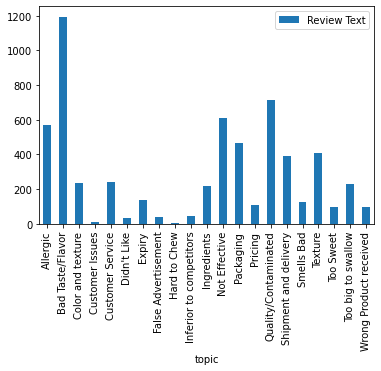

In [12]:
fig = plt.figure(figsize=(8,6))
df_train.groupby('topic').count().plot.bar(ylim=0)
plt.show()

We can see from the output of **value_counts()** and from the image above that our dataset has imbalanced class distribution. This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. If the class imbalance is not dealt with, then there is a risk that all the minority classes can be misclassified, and still, the accuracy of the model will be high. For example, in a classification problem with only 2 classes, with the majority class being 95 in the count and the minority class being only 5, the classification model can predict every sample to be classified as majority class and still get an accuracy of 95%. That is why the class imbalance problem has to be rectified before training the model but first we clean our data using **Regular Expression** as there are a number of unwanted characters in text data. Regular Expression can be used to check if a string contains the specified search pattern.

##Data Cleaning

We define a function **clean_str()** which takes a single string as input and then use **re.sub()** function to remove all the unnecessary characters like random digits, spaces,\n,\r, etc from the string and return a clean string with all the characters in lower case.



In [13]:
import re


In [14]:
def clean_str(string):
  string=re.sub(r"\n","",string)
  string=re.sub(r"\r","",string)
  string=re.sub(r"[0-9]","digit",string)
  string=re.sub(r"\'","",string)
  string=re.sub(r"\"","",string)
  return string.strip().lower()
X=[]
for i in range(df_train.shape[0]):
  X.append(clean_str(df_train.iloc[i][0]))




Then, to get the data cleaned in our independent features, we loop through the rows of **df_train** and save the cleaned strings to a separate list **X[ ]**.

In [15]:
df_train["Review Text"]=X

In [16]:
df_train.shape

(5959, 2)

##Resampling of Data

Now once we have cleaned our data, we can handle the imbalanced class distribution problem by using **Random Over Sampler** or **Random Under Sampler**.

Random Sampling can be of two types : 

*   Random Over Sampler - Randomly duplicate examples in the minority class.
*   Random Under Sampler -  Randomly delete examples in the majority class.
We use the Random Over Sampler technique as the minority class samples are very less if compared to the majority class samples. And , if we use Random Under Sampler then a major chunk of our dataset will be deleted which is not advisable.


To use Random Over Sampler, we import **RandomOverSampler** from **imblearn** python library.

In [17]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
X=df_train.copy()
X.drop(columns="topic",inplace=True)
X


,Review Text
0,"did nothing for me, didnt help lost even with ..."
1,"did nothing for me, didnt help lost even with ..."
2,i have bought these bags and immediately open...
3,gave me an allergic reaction on my face :(
4,these dont compare to the name brand wipes. fa...
...,...
5954,total damage . the vitamin is melted on one si...
5955,the pills smell awful and taste the same
5956,the pills smell awful and taste the same
5957,stuff taste horrible


In [19]:
Y=df_train.copy()
Y.drop(columns="Review Text",inplace=True)
Y

,topic
0,Shipment and delivery
1,Not Effective
2,Customer Service
3,Allergic
4,Texture
...,...
5954,Packaging
5955,Smells Bad
5956,Bad Taste/Flavor
5957,Bad Taste/Flavor


Now to use Random Over Sampler , we create an object **ros** of **RandomOverSampler** class with parameter **random_state=42**. We use the **random_state** parameter in order to reproduce the same result every time we create the object. 

Then we use **fit_sample**() function using the object **ros** to get the balanced dataset(**X_res**,**Y_res**) by class.And we will pass **X** as input which contains data present in column **Review Text** and **Y** as output which contains data present in column **topic**.

In [20]:
ros=RandomOverSampler(random_state=42)
X_res,Y_res=ros.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


By using the **shape** attribute we can see that the number of rows in **X_res** is greater than **X[ ]** as we have used Random Over Sampler which duplicates the samples corresponding to minority classes.

In [21]:
X_res.shape

(25074, 1)

In [22]:
Y_res.shape

(25074,)

We import the **collections** package to count the unique values present in **Y_res**, and now every class has 1194 instances each and we have solved the problem of **class imbalance** which would have caused the minority classes to be wrongly labelled, otherwise.

In [23]:
import collections
collections.Counter(Y_res)

Counter({'Allergic': 1194,
         'Bad Taste/Flavor': 1194,
         'Color and texture': 1194,
         'Customer Issues': 1194,
         'Customer Service': 1194,
         "Didn't Like": 1194,
         'Expiry': 1194,
         'False Advertisement': 1194,
         'Hard to Chew': 1194,
         'Inferior to competitors': 1194,
         'Ingredients': 1194,
         'Not Effective': 1194,
         'Packaging': 1194,
         'Pricing': 1194,
         'Quality/Contaminated': 1194,
         'Shipment and delivery': 1194,
         'Smells Bad': 1194,
         'Texture': 1194,
         'Too Sweet': 1194,
         'Too big to swallow': 1194,
         'Wrong Product received': 1194})

##Vectorization

Now that we have dealt with the imbalanced class distribution, before training the model, we use **TfidVectorizer** from **sklearn** python library to convert our text data to a vectorized format of numbers.


Machine learning algorithms cannot work with raw text directly. That is why we use **TfidfVectorizer** to convert the text data into tf-idf weights. TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is a very common algorithm to transform the text into a meaningful representation of numbers which is used to fit a machine algorithm for prediction. A higher value of TF-IDF means the importance of that word is greater while making a prediction. 


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

Now we create a DataFrame using **Pandas.Dataframe()** with **X_res** as input.


In [25]:
df = pd.DataFrame(data=X_res, columns=["Review Text"])

To use **TfidfVectorizer** , we create an object **tfidf_vectorizer** of **TfidfVectorizer** class with parameter **use_idf** set to true as we need idf values for our model.To transform our text data, we use **fit_transform()** function of **TfidfVectorizer** class using the object we just created and passing the **Review Text** column in **df** DataFrame as input.

In [26]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df["Review Text"])

Now **tfidf_vectorizer_vectors** is the vectorized format of our text data having the same number of rows as **X_res**. The 8323 columns correspond to each unique word present in our text.

In [27]:
tfidf_vectorizer_vectors.shape

(25074, 8323)

##Training the Model

Once we have our data in our desired format, we use **train_test_split** from **sklearn** python library. The **train_test_split** function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building our model. The testing subset is for using the model on previouslyunseen dataset to evaluate the performance of the model.

In [28]:
from sklearn.model_selection import train_test_split

The input parameter for **train_test_split** function is the vectorized version of our text data i.e. **tfidf_vectorizer_vectors** and the output parameter is **Y_res**. The **test_size** parameter is used to decide in what proportion the training and test data is split. And **random_state** parameter is to ensure that the results can be reproduced while running the code again.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorizer_vectors,Y_res , test_size = 0.45, random_state = 42, shuffle = True)

We use a gradient boost classifier for this classification problem. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

We import **ensemble** from **sklearn** python library for using **GradientBoostingClassifier**.

In [30]:
from sklearn import ensemble 

While defining the **classifier**, we set the **n_estimators** parameter to 100 i.e. the total number of decision trees to be built with 0.5 as **learning_rate**. Also, the **max_Depth** parameter is set to 6 which is used to set the maximum depth allowed for a decision tree.

In [31]:
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #learning rate
    max_depth = 6
)

To train the model, we just need to use the **fit()** function with **X_train** as input and **y_train** as output values

In [32]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##Checking the efficiency of the Model

To check the accuracy of the model, we import **classififcation_report** from **sklearn** python library. 

In [33]:
from sklearn.metrics import classification_report

To check the accuracy , we make predictions using **predict()** function using our **classifier** object and pass **X_test** as input. Then we compare the predictions made by the model with the given output values already present in **y_test**.

In [34]:
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

                         precision    recall  f1-score   support

               Allergic       0.67      0.58      0.62       570
       Bad Taste/Flavor       0.49      0.43      0.46       522
      Color and texture       0.63      0.61      0.62       532
        Customer Issues       0.99      1.00      1.00       568
       Customer Service       0.80      0.63      0.71       556
            Didn't Like       0.92      1.00      0.96       539
                 Expiry       0.89      0.96      0.92       545
    False Advertisement       0.97      0.89      0.93       561
           Hard to Chew       0.99      1.00      1.00       528
Inferior to competitors       0.94      0.94      0.94       568
            Ingredients       0.71      0.64      0.68       496
          Not Effective       0.47      0.75      0.58       547
              Packaging       0.76      0.66      0.70       530
                Pricing       0.88      0.93      0.91       536
   Quality/Contaminated 

We can see by the classification report that our model has an **accuracy** of **78%**. **Recall** is the number of relevant documents retrieved by a search divided by the total number of existing relevant documents, while **precision** is the number of relevant documents retrieved by a search divided by the total number of documents retrieved by that search. And the F1 Score is the 2*((precision * recall)/(precision+recall)).

# Deployment

For deployment, the following details should be kept in mind:
- On an Nvidia P4 16Gb GPU, it took roughly 30 mins to finish running 1 epoch of training.
- The following libraries (python packages) are needed:
  *   Pandas
  *   Matplotlib
  *   Re
  *   Imblearn
  *   Collections
  *   Sklearn






